In [1]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0

# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message, stream_count])
    stream_count += 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message", "stream"])

data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['user', 'date'])

# Calculate the total number of messages per stream per user
total_messages_per_stream = data.groupby(['user', 'stream']).size().reset_index(name='total_messages')

# Calculate the time difference between the first and last messages for each stream per user
watch_lengths = data.groupby(['user', 'stream'])['date'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index(name='watch_length')

# Calculate the total stream length for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index(name='stream_length')

# Merge the user-specific data with the stream length data
user_stats = total_messages_per_stream.merge(watch_lengths, on=['user', 'stream'])
user_stats = user_stats.merge(stream_lengths, on='stream')

# Add calculated columns
user_stats['watch_length_in_hour'] = user_stats['watch_length'] / 3600
user_stats['stream_length_in_hour'] = user_stats['stream_length'] / 3600
user_stats['percentage'] = user_stats['watch_length'] / user_stats['stream_length'] * 100

# Sort and reset index
user_stats = user_stats.sort_values(by=['user', 'stream']).reset_index(drop=True)

# Calculate total watch time for all users
all_users_watch = user_stats.groupby('user')['watch_length'].sum().reset_index(name='total_watch_length')
all_users_watch['total_watch_length_in_days'] = all_users_watch['total_watch_length'] / 3600 / 24




In [4]:
all_users_watch['percentage'] = all_users_watch['total_watch_length'] / 1291767 *100

all_users_watch['percentage'].describe()

count    5610.000000
mean        0.689332
std         3.910946
min         0.000000
25%         0.000000
50%         0.008980
75%         0.154149
max        99.238717
Name: percentage, dtype: float64

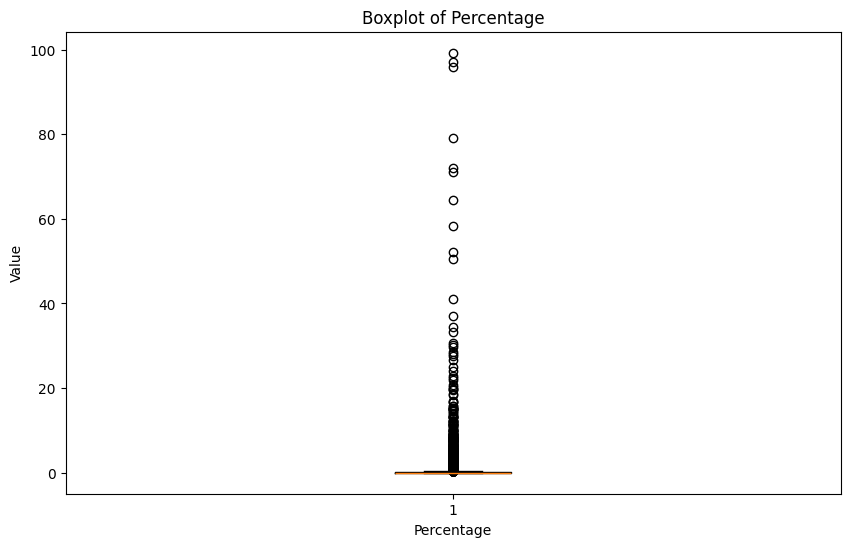

In [5]:
import matplotlib.pyplot as plt

# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.boxplot(all_users_watch['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.ylabel('Value')
plt.show()


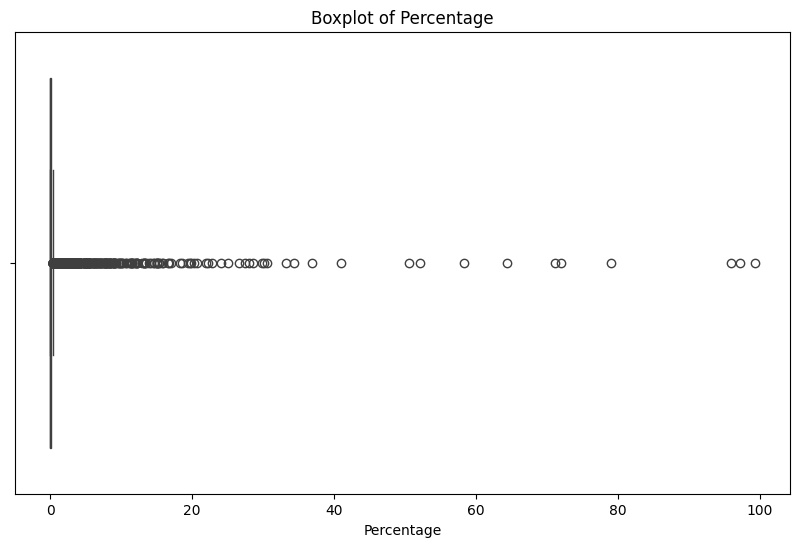

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
sns.boxplot(x=all_users_watch['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.show()


In [7]:
all_users_watch[all_users_watch['percentage']>30]

,user,total_watch_length,total_watch_length_in_days,percentage
23,1206paul_,1020617.0,11.812697,79.009372
179,Aloddin,389878.0,4.512477,30.181759
182,Aluminiumminimumimmunity,929337.0,10.756215,71.943083
248,Banties1g,672779.0,7.786794,52.082071
354,Cuhhsin,477266.0,5.523912,36.946756
729,IvanOnMyOwn,919184.0,10.638704,71.157105
969,Martin_Gales,1238100.0,14.329861,95.845458
1250,Risc__V,653823.0,7.567396,50.614623
1420,StreamElements,1281933.0,14.837187,99.238717
1545,Typhu25,394476.0,4.565694,30.537705


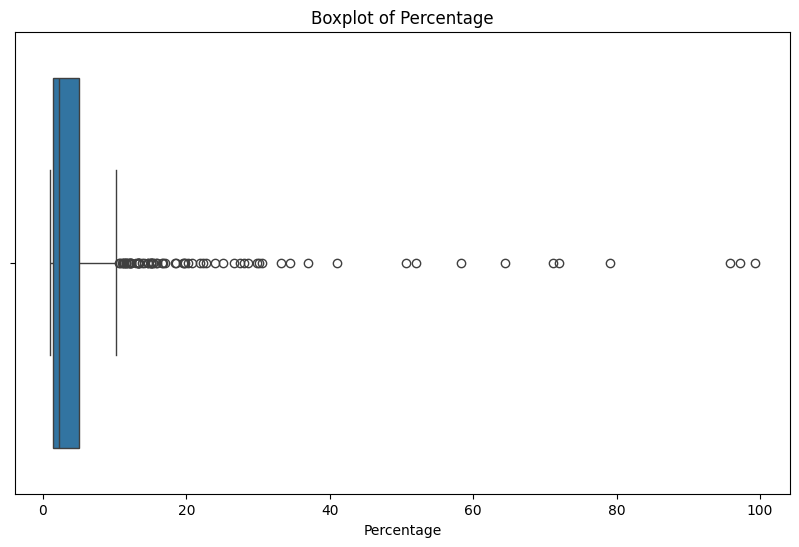

In [18]:
# Assuming 'all_users_watch' is your DataFrame
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
sns.boxplot(x=all_users_watch[all_users_watch['percentage']>1]['percentage'])

plt.title('Boxplot of Percentage')
plt.xlabel('Percentage')
plt.show()